<h1>Observations</h1>
<p>1. observation</p>
<p>2. observation</p>
<p>3. observation</p>

In [1]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
# Import data into pandas from CSV
city_data = 'raw_data/city_data.csv'
ride_data = 'raw_data/ride_data.csv'

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

In [3]:
# Summary statistics for city data
print(city_data_df.head(10))
print()
print(city_data_df.describe())
print()
print(city_data_df.dtypes)
print()
print(city_data_df.count())
print()
print(city_data_df["type"].value_counts())

                city  driver_count   type
0         Kelseyland            63  Urban
1         Nguyenbury             8  Urban
2       East Douglas            12  Urban
3      West Dawnfurt            34  Urban
4     Rodriguezburgh            52  Urban
5  South Josephville             4  Urban
6   West Sydneyhaven            70  Urban
7        Travisville            37  Urban
8        Torresshire            70  Urban
9          Lisaville            66  Urban

       driver_count
count    126.000000
mean      26.579365
std       21.438415
min        1.000000
25%        9.000000
50%       20.000000
75%       43.000000
max       73.000000

city            object
driver_count     int64
type            object
dtype: object

city            126
driver_count    126
type            126
dtype: int64

Urban       66
Suburban    42
Rural       18
Name: type, dtype: int64


In [4]:
# Summary statistics for ride data
print(ride_data_df.head(10))
print()
print(ride_data_df.describe())
print()
print(ride_data_df.dtypes)
print()
print(ride_data_df.count())

            city                 date   fare        ride_id
0       Sarabury  2016-01-16 13:49:27  38.35  5403689035038
1      South Roy  2016-01-02 18:42:34  17.49  4036272335942
2    Wiseborough  2016-01-21 17:35:29  44.18  3645042422587
3    Spencertown  2016-07-31 14:53:22   6.87  2242596575892
4     Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673
5    New Jeffrey  2016-02-22 18:36:25  36.01  9757888452346
6  Port Johnstad  2016-06-07 02:39:58  17.15  4352278259335
7      Jacobfort  2016-09-20 20:58:37  22.98  1500221409082
8    Travisville  2016-01-15 17:32:02  27.39   850152768361
9     Sandymouth  2016-11-16 07:27:00  21.61  2389035050524

              fare       ride_id
count  2375.000000  2.375000e+03
mean     26.800552  4.865401e+12
std      12.007118  2.899040e+12
min       4.050000  2.238753e+09
25%      17.235000  2.360004e+12
50%      26.450000  4.821968e+12
75%      36.635000  7.366161e+12
max      59.650000  9.997901e+12

city        object
date        object
far

In [5]:
# This section combines the two dataframes and prints out summary statistics
combined_df = pd.merge(city_data_df, ride_data_df, how='outer', on='city')

print(combined_df.head(10))
print()
print(combined_df.describe())
print()
print(combined_df.dtypes)
print()
print(combined_df.count())

         city  driver_count   type                 date   fare        ride_id
0  Kelseyland            63  Urban  2016-08-19 04:27:52   5.51  6246006544795
1  Kelseyland            63  Urban  2016-04-17 06:59:50   5.54  7466473222333
2  Kelseyland            63  Urban  2016-05-04 15:06:07  30.54  2140501382736
3  Kelseyland            63  Urban  2016-01-25 20:44:56  12.08  1896987891309
4  Kelseyland            63  Urban  2016-08-09 18:19:47  17.91  8784212854829
5  Kelseyland            63  Urban  2016-10-24 15:15:46  33.56  4797969661996
6  Kelseyland            63  Urban  2016-06-06 13:54:23  20.81  9811478565448
7  Kelseyland            63  Urban  2016-08-10 07:02:40  44.53  1563171128434
8  Kelseyland            63  Urban  2016-07-05 17:37:13  29.02  6897992353955
9  Kelseyland            63  Urban  2016-04-25 02:18:31  20.05  1148374505062

       driver_count         fare       ride_id
count    2407.00000  2407.000000  2.407000e+03
mean       31.14167    26.867104  4.856048e+12


<h1>Total Fares by City Type</h1>

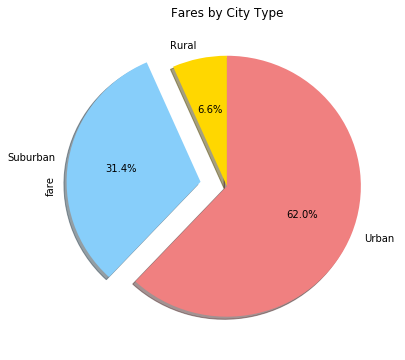

In [20]:
# This section displays a pie chart of fares by city type

# Group the combined dataframe by type
type_group = combined_df.groupby("type")

# Sum up fares by type
ride_total_by_type = type_group["fare"].sum()

pie_colors = ["gold", "lightskyblue","lightcoral"]
pie_explode = (0,0.2,0)
   
# Create a pie chart based upon the trip duration of that single bike
ride_pie = ride_total_by_type.plot(kind="pie", explode=pie_explode, colors=pie_colors, title="Fares by City Type",
                                  startangle=90, shadow=True, autopct='%1.1f%%', figsize=(6, 6)) 

plt.show()

<h1>Total Rides by City Type</h1>

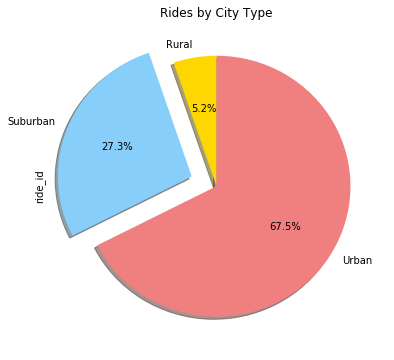

In [17]:
# This section displays a pie chart of rides by city type

# Sum up fares by type
fare_total_by_type = type_group["ride_id"].count()
   
# Create a pie chart based upon the trip duration of that single bike
type_pie = fare_total_by_type.plot(kind="pie", explode=pie_explode, colors=pie_colors, title="Rides by City Type",
                                  startangle=90, shadow=True, autopct='%1.1f%%', figsize=(6, 6)) 

plt.show()

<h1>Total Drivers by City Type</h1>

In [ ]:
plt.title("NYC Gym Popularity")
plt.pie(members, explode=explode, labels=gyms, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()